In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy. stats import boxcox
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Задача:
добиться наименьшего MSE на test при предсказании длины колесной базы конфигурации (в миллиметрах). <br>

**Знакомство с данными** <br>

В датасете содержится информация о технических характеристиках разных конфигураций автомобилей

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [3]:
df.head(1)

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360


In [4]:
print(f'В данных {df.shape[0]} строк и {df.shape[1]} столбца')

В данных 43245 строк и 32 столбца


In [5]:
#описательная статистика количественных данных (в нашем датасете только количественные данные)
df.describe()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
count,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,...,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000
mean,30663.219933,4.273511,-0.875116,30684.557267,8.970296,4.290234,0.628512,4.576506,3.756481,1999.358377,...,3.049370,1.867014,12.964828,53.300937,1790.357267,18.434177,2.991421,0.002035,4.474783,2660.826246
std,17666.118635,2.929769,2.904357,17562.733960,6.148230,4.765435,1.230331,1.161683,1.720373,13.433605,...,1.375937,0.350225,4.499009,24.845687,616.347148,9.541600,0.142150,0.045065,39.934808,236.315583
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1904.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1190.000000
25%,15455.000000,3.000000,-1.000000,15578.000000,8.500000,-1.000000,0.000000,4.000000,4.000000,1991.000000,...,1.000000,2.000000,13.000000,46.000000,1992.000000,10.000000,3.000000,0.000000,1.000000,2510.000000
50%,30632.000000,3.000000,-1.000000,30756.000000,9.800000,5.400000,0.000000,4.000000,4.000000,2001.000000,...,4.000000,2.000000,13.000000,58.000000,2002.000000,16.000000,3.000000,0.000000,1.000000,2640.000000
75%,45951.000000,8.000000,-1.000000,45793.000000,10.800000,8.000000,0.000000,6.000000,5.000000,2010.000000,...,4.000000,2.000000,13.000000,68.000000,2011.000000,26.000000,3.000000,0.000000,1.000000,2774.000000
max,61228.000000,10.000000,200.000000,61175.000000,23.500000,40.000000,6.000000,10.000000,8.000000,2021.000000,...,4.000000,2.000000,35.000000,166.000000,2021.000000,36.000000,3.000000,1.000000,658.000000,5885.000000


До предобработки данных мы получаем следующее значение MSE

In [6]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(train_X, train_y)
mse_train = mean_squared_error(reg.predict(train_X), train_y)
mse_test = mean_squared_error(reg.predict(test_X), test_y)
print(f'MSE train: {mse_train}\nMSE test: {mse_test}\n')

MSE train: 29840.12125086528
MSE test: 31021.02439985435



**Предобработка данных**

In [7]:
#приведем заголовки к единому формату
df.columns = ['_'.join(sl.split('-')) for sl in list(df.columns)]

In [8]:
#проверим данные на пропуски
df.isnull().sum()

index                             0
back_suspension                   0
battery_capacity                  0
charge_time                       0
compression                       0
consumption_mixed                 0
cylinders_order                   0
cylinders_value                   0
engine_feeding                    0
engine_start                      0
engine_stop                       0
engine_type                       0
gear_type                         0
luxury                            0
max_speed                         0
power_electro_kw                  0
supply_system                     0
valves                            0
valvetrain                        0
weight                            0
configurations_auto_premiere      0
configurations_back_wheel_base    0
configurations_front_brake        0
configurations_safety_rating      0
configurations_seats              0
configurations_tank_volume        0
supergen_year_stop                0
models_country_from         

In [9]:
#проверим данные на дубликаты
df.duplicated().sum()

0

В данных нет пропусков и дубликатов. <br>
Далее посмотрим на столбцы и попытаемся понять, какую информацию они в себе содержат, возможно в данных присутствуют аномалии.

После анализа каждого столбца было принято внести следующие изменения в данных: <br>
Удалим все строчки с отрицательными или нулевыми значениями в столбцах: 
1. **charge_time** - время зарядки аккумулятора 
2. **compression** - компрессия в автомобиле — это давление, создаваемое в цилиндре в конце такта сжатия, когда поршень идёт от нижней мёртвой точки к верхней, сжимая воздух или смесь. 
3. **consumption_mixed** - это расход топлива в смешанном цикле на 100 км, л. 
4. **max_speed** - максимальная скорость. 
5. **weight** - вес 
6. **configurations_seats** - конфигурация сидений, должно быть >= 1
7. **configurations_tank_volume**
8. **configurations_back_wheel_base** 

В данных столбцах содержаться отрицательные значения, но скорее всего это ошибка в данных, поэтому возьмем эти значения по модулю.
**supergen_year_stop** и **consumption_mixed**

В модель включать не будем следующие столбцы:
1. **index** - данный столбец не информативны для модели. 
2. **battery_capacity** - ёмкость батареи. В столбце 43 093 значения -1, неясно с чем связано это значения. 
3. **power_electro_kw** в столбце 43 032 значения -1, неясно с чем связано это значения. 
4. **engine_stop** в столбце 4226 значения 0, неясно с чем связано это значения. 

Для выявления аномалий были использованы методы: <br>
.unique()
.min()
.max()
.query()

In [11]:
df['supergen_year_stop'] = df['supergen_year_stop'].abs()
df['consumption_mixed'] = df['consumption_mixed'].abs()
df = df[df['configurations_back_wheel_base'] > 0]
df = df[df['weight'] > 0]
df = df[df['configurations_tank_volume'] > 0]
df = df[df['configurations_seats'] > 0]
df = df[df['max_speed'] > 0]
df = df[df['compression'] > 0]
df = df[df['charge_time'] > 0]
df = df.drop(["index", 'battery_capacity', 'power_electro_kw', 'engine_stop'], axis=1)

In [12]:
print(f'В данных {df.shape[0]} строк и {df.shape[1]} столбца')

В данных 21463 строк и 32 столбца


Посмотрим на корреляцию между признаками

corr_mat = df.corr(method='spearman')
plt.figure(figsize=(20, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm',  fmt='.2g')
plt.title('Матрица корреляции', fontsize=20)
plt.show()

Посмотрим на результат

In [18]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(train_X, train_y)
mse_train = mean_squared_error(reg.predict(train_X), train_y)
mse_test = mean_squared_error(reg.predict(test_X), test_y)
print(f'MSE train: {mse_train}\nMSE test: {mse_test}\n')

MSE train: 12629.076132065344
MSE test: 13317.705306008584



Дополнительно посмотрим на гистограммы распределения данных

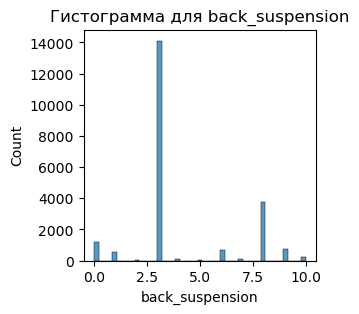

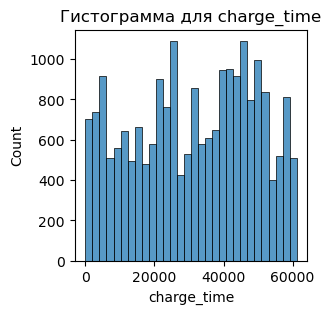

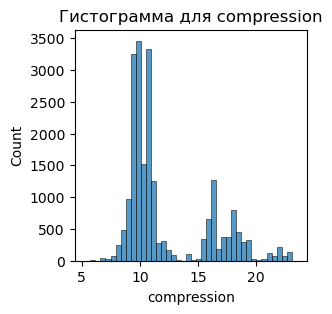

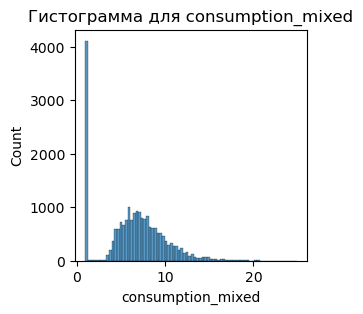

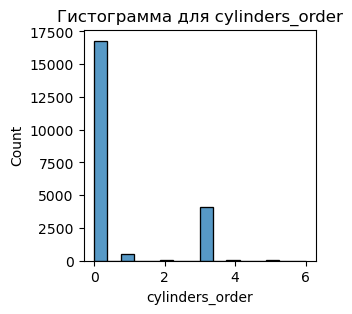

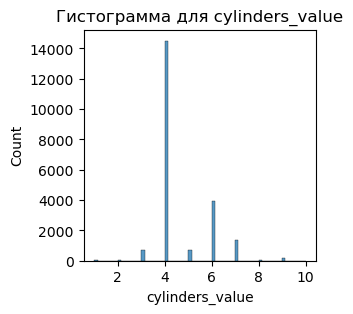

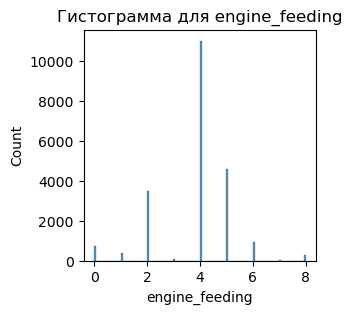

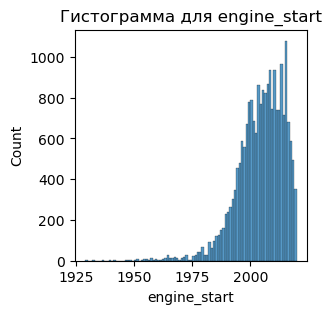

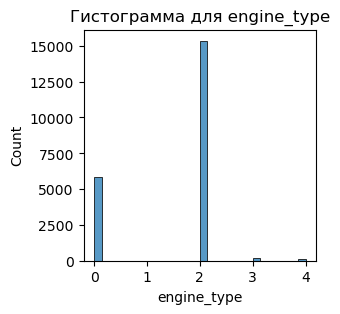

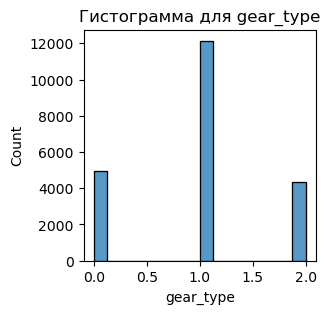

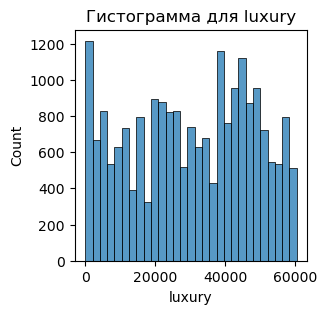

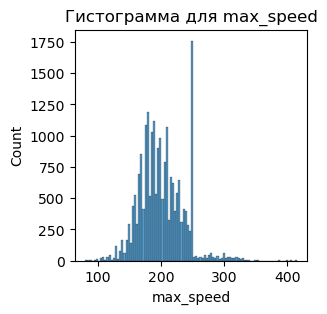

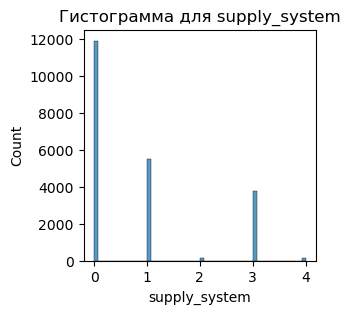

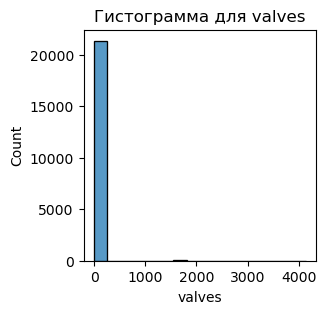

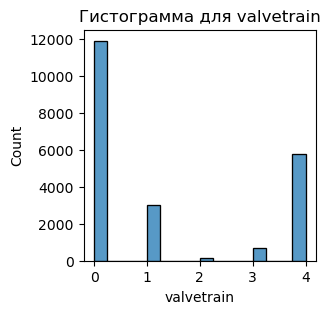

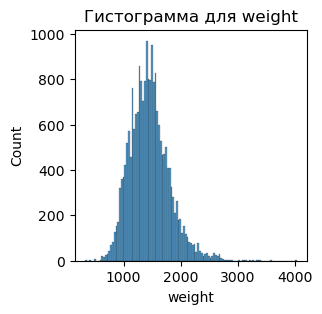

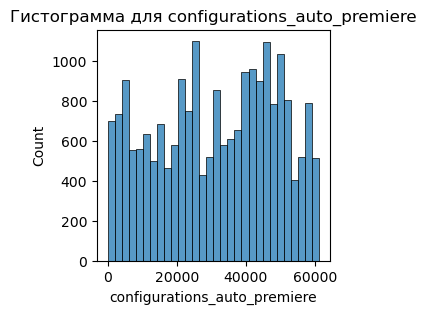

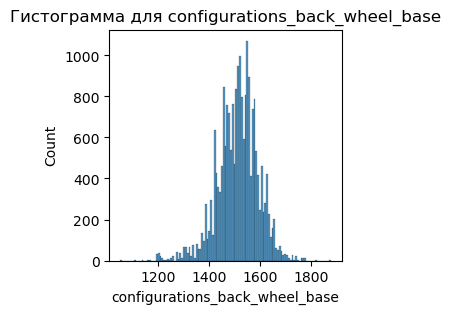

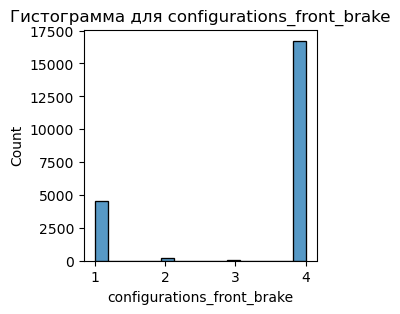

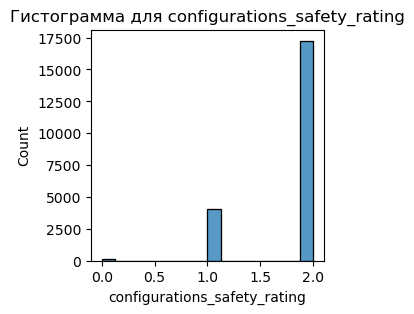

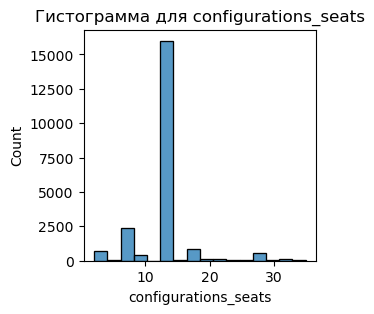

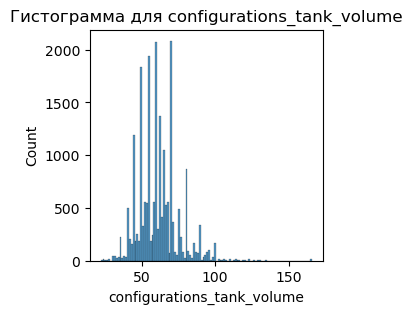

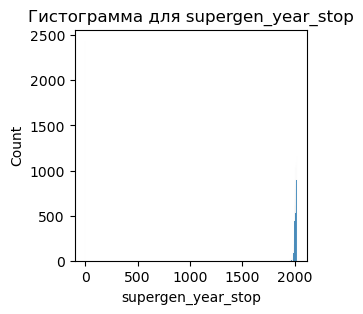

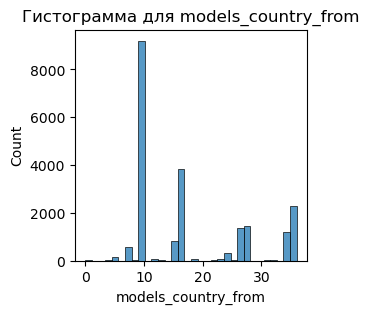

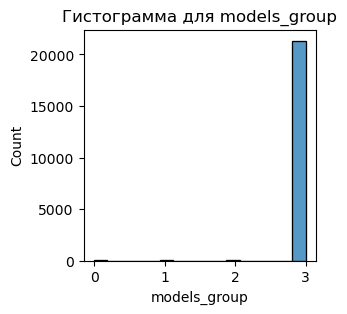

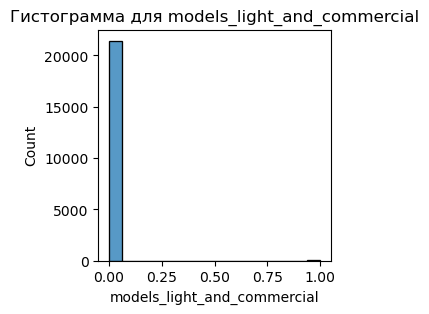

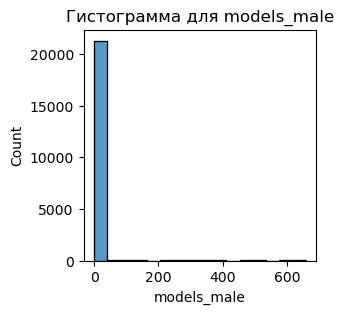

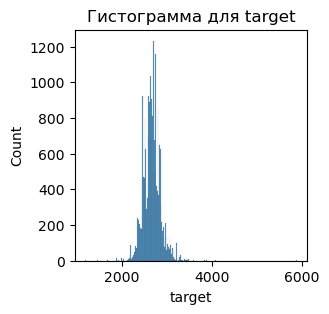

In [13]:
for _ in df.columns:
    plt.figure(figsize = (3, 3))
    sns.histplot(data=df[_])
    plt.title(f'Гистограмма для {_}')
    plt.show()

Далее попробуем разные методы преобразования данных для уменьшения MSE. 

In [30]:
#Стандартизация
data = df.copy()
scaler = StandardScaler()
data[data.columns[data.columns != 'target']] = scaler.fit_transform(data[data.columns[data.columns != 'target']])

In [31]:
data.head(1)

,back_suspension,charge_time,compression,consumption_mixed,cylinders_order,cylinders_value,engine_feeding,engine_start,engine_type,gear_type,...,configurations_front_brake,configurations_safety_rating,configurations_seats,configurations_tank_volume,supergen_year_stop,models_country_from,models_group,models_light_and_commercial,models_male,target
1,-0.431836,0.779287,-1.142999,-1.541289,1.983842,2.14334,0.115524,-2.212833,0.5826,1.563474,...,0.528956,0.485149,0.039288,3.418449,0.335972,1.724903,0.070224,-0.029766,-0.076305,3060


In [32]:
X = data.drop(["target"], axis=1)
y = data[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(train_X, train_y)
mse_train = mean_squared_error(reg.predict(train_X), train_y)
mse_test = mean_squared_error(reg.predict(test_X), test_y)
print(f'MSE train: {mse_train}\nMSE test: {mse_test}\n')

MSE train: 12636.166688274714
MSE test: 13314.26718141411



MSE test намного уменьшился, попробуем другой способ. <br>
Для логарифмирования необходимы только положительные значения, от отрицательных мы избавились, теперь необходимо к нулевым прибавить маленькую константу.

In [34]:
#логарифмирование
lg_data = df.copy()
lg_data = lg_data.where(lg_data != 0, lg_data + 0.0000001)
lg_data[lg_data.columns[lg_data.columns != 'target']] = np.log(lg_data[lg_data.columns[lg_data.columns != 'target']])

In [35]:
lg_data.head(1)

,back_suspension,charge_time,compression,consumption_mixed,cylinders_order,cylinders_value,engine_feeding,engine_start,engine_type,gear_type,...,configurations_front_brake,configurations_safety_rating,configurations_seats,configurations_tank_volume,supergen_year_stop,models_country_from,models_group,models_light_and_commercial,models_male,target
1,1.098612,10.711569,2.079442,0.0,1.098612,1.94591,1.386294,7.591862,0.693147,0.693147,...,1.386294,0.693147,2.564949,4.682131,7.597396,3.526361,1.098612,-16.118096,0.0,3060


In [36]:
X = lg_data.drop(["target"], axis=1)
y = lg_data[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(train_X, train_y)
mse_train = mean_squared_error(reg.predict(train_X), train_y)
mse_test = mean_squared_error(reg.predict(test_X), test_y)
print(f'MSE train: {mse_train}\nMSE test: {mse_test}\n')

MSE train: 11980.995350784337
MSE test: 12608.764192468452



### Вывод:
В ходе обработки данных были обнаружены аномалии, которые привели к удалению большого количество значений (количество строк уменьшилось с 43245 до 21463).
Для построения модели были выбраны 28 столбцов, таким образом мы избежали дополнительной обработки данных. <br>
На данном этапе при обучении модели мы получили результат: <br>
MSE train: 12636.166688274716 <br>
MSE test: 13314.267181414101 <br>
<br>

Далее были созданы 2 копии датасета и проведены преобразования: 
1. результат стандартизации <br>
MSE train: 12636.166688274714 <br>
MSE test: 13314.26718141411 <br>
2. результат логарифмирования <br>
MSE train: 11980.995350784337 <br>
MSE test: 12608.764192468452 <br>

Получим, что наилучший результат был получен после 